In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

584

In [6]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#    - City, country, and date
#    - Latitude and longitude
#    - Maximum temperature
#    - Humidity
#    - Cloudiness
#    - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3974a24374277450bf992714ddfd803


In [9]:
# Import the time library and the datetime module from the datetime library.

import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mecca
Processing Record 2 of Set 1 | katherine
Processing Record 3 of Set 1 | ahvaz
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | cabo rojo
Processing Record 7 of Set 1 | shumskiy
Processing Record 8 of Set 1 | owo
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | boshnyakovo
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | caravelas
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | bandarbeyla
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | yellowknife
P

Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | bargal
City not found. Skipping...
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | villa corzo
Processing Record 45 of Set 4 | acapulco
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | trofors
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | maracaibo
Processing Record 1 of Set 5 | soyo
Processing Record 2 of Set 5 | ajaccio
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | kiama
Processing Record 5 of Set 5 | limache
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | kruisfontein
Processing Record 8 of Set 5 | bubaque
Processing Record 9 of Set 5 | kalia
Processing Record 10 of Set 

Processing Record 25 of Set 8 | calvinia
Processing Record 26 of Set 8 | hobyo
Processing Record 27 of Set 8 | tres passos
Processing Record 28 of Set 8 | karema
Processing Record 29 of Set 8 | roma
Processing Record 30 of Set 8 | solnechnyy
Processing Record 31 of Set 8 | redcar
Processing Record 32 of Set 8 | mayo
Processing Record 33 of Set 8 | wilmington
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | phan rang
City not found. Skipping...
Processing Record 36 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 37 of Set 8 | amahai
Processing Record 38 of Set 8 | pahrump
Processing Record 39 of Set 8 | fengzhen
Processing Record 40 of Set 8 | san lorenzo
Processing Record 41 of Set 8 | la jagua del pilar
Processing Record 42 of Set 8 | raga
Processing Record 43 of Set 8 | fereydunshahr
Processing Record 44 of Set 8 | misratah
Processing Record 45 of Set 8 | muisne
Processing Record 46 of Set 8 | naryan-mar
Processing Record 47 of Set 8 | for

Processing Record 14 of Set 12 | tautira
Processing Record 15 of Set 12 | ovalle
Processing Record 16 of Set 12 | port keats
Processing Record 17 of Set 12 | lardos
Processing Record 18 of Set 12 | lasa
Processing Record 19 of Set 12 | omsukchan
Processing Record 20 of Set 12 | vera cruz
Processing Record 21 of Set 12 | kuching
Processing Record 22 of Set 12 | egvekinot
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | plock
Processing Record 25 of Set 12 | blue springs
Processing Record 26 of Set 12 | bonfim
Processing Record 27 of Set 12 | iquique
Processing Record 28 of Set 12 | kiruna
Processing Record 29 of Set 12 | sattenapalle
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | loyga
Processing Record 32 of Set 12 | rockland
Processing Record 33 of Set 12 | sabalgarh
Processing Record 34 of Set 12 | la ronge
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mecca,21.4267,39.8261,80.11,51,2,5.17,SA,2022-05-06 00:17:31
1,Katherine,-14.4667,132.2667,79.12,29,0,14.97,AU,2022-05-06 00:17:31
2,Ahvaz,31.3203,48.6693,82.35,27,5,9.95,IR,2022-05-06 00:13:54
3,San Patricio,28.0170,-97.5169,87.89,70,65,14.18,US,2022-05-06 00:17:32
4,Punta Arenas,-53.1500,-70.9167,42.91,70,75,34.52,CL,2022-05-06 00:13:46
5,Cabo Rojo,18.0866,-67.1457,80.98,80,85,8.25,PR,2022-05-06 00:17:32
6,Shumskiy,54.8318,99.1328,41.41,48,100,7.54,RU,2022-05-06 00:17:33
7,Owo,7.1962,5.5868,74.19,93,89,3.65,NG,2022-05-06 00:17:33
8,Upernavik,72.7868,-56.1549,5.56,91,40,5.03,GL,2022-05-06 00:17:34
9,Busselton,-33.6500,115.3333,54.77,64,0,12.03,AU,2022-05-06 00:17:34


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mecca,SA,2022-05-06 00:17:31,21.4267,39.8261,80.11,51,2,5.17
1,Katherine,AU,2022-05-06 00:17:31,-14.4667,132.2667,79.12,29,0,14.97
2,Ahvaz,IR,2022-05-06 00:13:54,31.3203,48.6693,82.35,27,5,9.95
3,San Patricio,US,2022-05-06 00:17:32,28.0170,-97.5169,87.89,70,65,14.18
4,Punta Arenas,CL,2022-05-06 00:13:46,-53.1500,-70.9167,42.91,70,75,34.52
5,Cabo Rojo,PR,2022-05-06 00:17:32,18.0866,-67.1457,80.98,80,85,8.25
6,Shumskiy,RU,2022-05-06 00:17:33,54.8318,99.1328,41.41,48,100,7.54
7,Owo,NG,2022-05-06 00:17:33,7.1962,5.5868,74.19,93,89,3.65
8,Upernavik,GL,2022-05-06 00:17:34,72.7868,-56.1549,5.56,91,40,5.03
9,Busselton,AU,2022-05-06 00:17:34,-33.6500,115.3333,54.77,64,0,12.03


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/05/22'

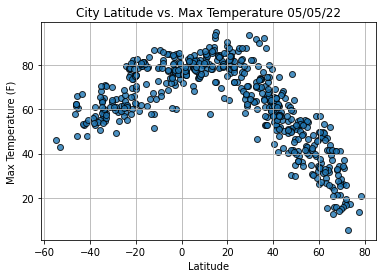

In [16]:
# Import time module
import time
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

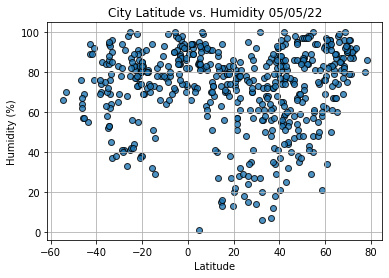

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

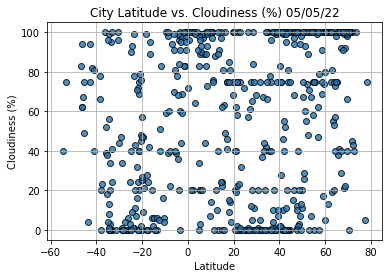

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

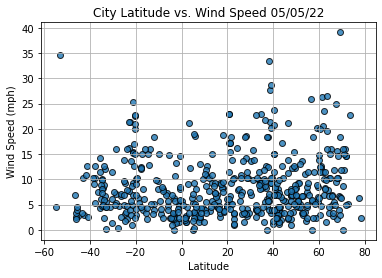

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Caravelas
Country                        BR
Date          2022-05-06 00:09:13
Lat                      -17.7125
Lng                      -39.2481
Max Temp                    79.65
Humidity                       80
Cloudiness                      0
Wind Speed                  12.53
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
532     True
533     True
534     True
535     True
536     True
Name: Lat, Length: 537, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mecca,SA,2022-05-06 00:17:31,21.4267,39.8261,80.11,51,2,5.17
2,Ahvaz,IR,2022-05-06 00:13:54,31.3203,48.6693,82.35,27,5,9.95
3,San Patricio,US,2022-05-06 00:17:32,28.0170,-97.5169,87.89,70,65,14.18
5,Cabo Rojo,PR,2022-05-06 00:17:32,18.0866,-67.1457,80.98,80,85,8.25
6,Shumskiy,RU,2022-05-06 00:17:33,54.8318,99.1328,41.41,48,100,7.54


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

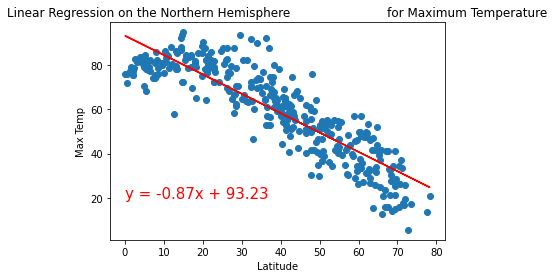

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,20))

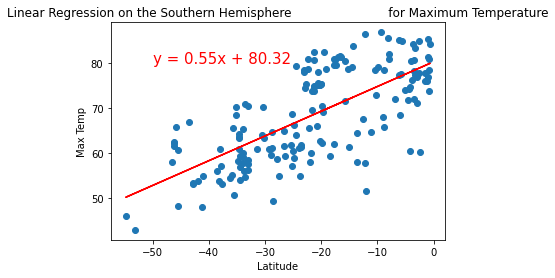

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

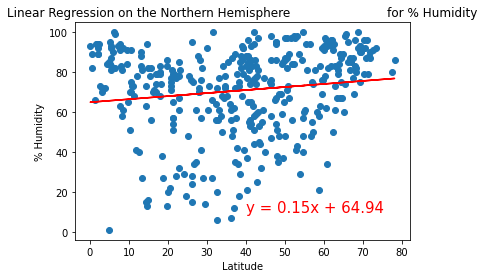

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

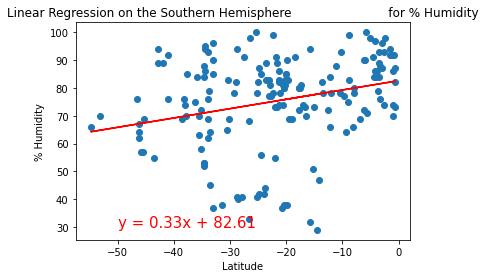

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

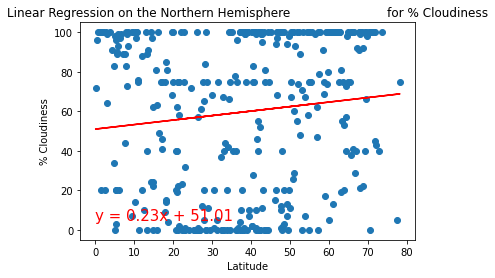

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,5))

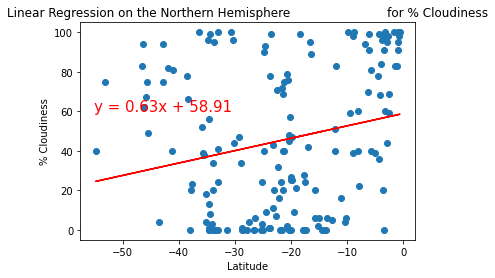

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

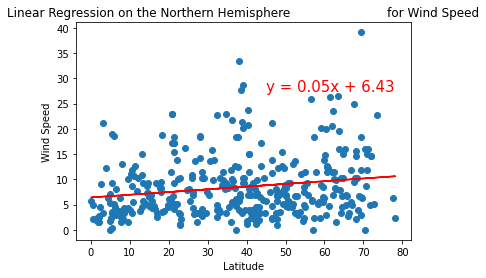

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,27.5))

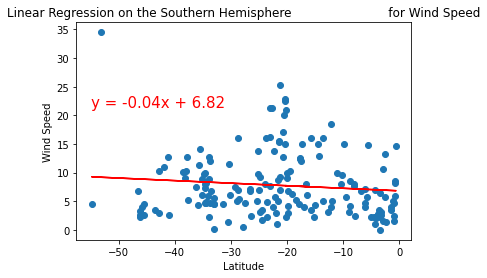

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,21.5))